In [2]:
import pandas as pd
import os
import re

In [17]:
df = pd.read_excel("/nfs/masi/MCL/file/clinical/LabelFile/MetaData/Smaller_Dataset.xlsx")
vumc_pid = df.loc[df['Institution'] == 'Pittsburgh']['MCL.ID'].tolist()
#print (vumc_pid)
vumc_pid = [str(i) for i in vumc_pid]

In [18]:
ori_root = '/nfs/masi/MCL/registration/affine_niftyreg_0/interp/ori'
link_root = '/nfs/masi/MCL/registration/affine_niftyreg_0/interp/ori_pitt'
data_list = os.listdir(ori_root)

cnt = 0
for i in range(len(data_list)):
    if re.split('[t]', data_list[i])[0] in vumc_pid:
        os.system('ln -s ' + ori_root + '/' + data_list[i] + ' ' + link_root + '/' + data_list[i])


In [19]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/MetaData/self_creat/session_20200128.csv')

df = df.loc[df['duplicated'] == 0]
df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/MetaData/self_creat/session_20200128_new.csv', index = False)
    

# make histogram of staging

In [81]:
dict_stage = {}
dict_source = {}
dict_inst = {}
dict_histype = {}
df0 = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/MetaData/FH cohort 1 clinical and imaging info to VB_2020JAN8.xlsx')
for i, item in df0.iterrows():
    if len(str(item['MCL_ID'])) < 6: continue
    mclid = str(item['MCL_ID']).replace(".0", '')
    if mclid not in dict_stage.keys():
        dict_stage[mclid] = []
    if mclid not in dict_source.keys():
        dict_source[mclid] = []
    if mclid not in dict_inst.keys():
        dict_inst[mclid] = []
    if mclid not in dict_histype.keys():
        dict_histype[mclid] = []
    dict_stage[mclid].append(item['Lung Cancer Staging'])
    dict_source[mclid].append('FH')
    dict_inst[mclid].append('UW')
    dict_histype[mclid].append(item['Lung Cancer Histology'])
    
    

df1 = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/MetaData/Smaller_Dataset.xlsx')
for i, item in df1.iterrows():
    if len(str(item['MCL.ID'])) < 6: continue
    mclid = str(item['MCL.ID']).replace(".0", '')
    if mclid not in dict_stage.keys():
        dict_stage[mclid] = []
    if mclid not in dict_source.keys():
        dict_source[mclid] = []
    if mclid not in dict_inst.keys():
        dict_inst[mclid] = []
    if mclid not in dict_histype.keys():
        dict_histype[mclid] = []
    dict_stage[mclid].append(item['Path.Stage'])
    dict_source[mclid].append('Smaller')
    dict_inst[mclid].append(item['Institution'])
    dict_histype[mclid].append(item['Histologic.Type'])


df2 = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/MetaData/PPM_2018.csv')
for i, item in df2.iterrows():
    if len(str(item['New_MCL_ID'])) < 6: continue
    mclid = str(item['New_MCL_ID']).replace(".0", '')
    if mclid not in dict_stage.keys():
        dict_stage[mclid] = []
    if mclid not in dict_source.keys():
        dict_source[mclid] = []
    if mclid not in dict_inst.keys():
        dict_inst[mclid] = []
    if mclid not in dict_histype.keys():
        dict_histype[mclid] = []
    dict_stage[mclid].append(item['Path.Stage'])
    dict_source[mclid].append('ppm')
    dict_inst[mclid].append(item['Institution'])
    dict_histype[mclid].append(item['Histologic.Type'])
    
df3 = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/MetaData/MCL_Nodule_2018OCT9.csv')
for i, item in df3.iterrows():
    if len(str(item['MCL.id'])) < 6: continue
    mclid = str(item['MCL.id']).replace(".0", '')
    if mclid not in dict_stage.keys():
        dict_stage[mclid] = []
    if mclid not in dict_source.keys():
        dict_source[mclid] = []
    if mclid not in dict_inst.keys():
        dict_inst[mclid] = []
    if mclid not in dict_histype.keys():
        dict_histype[mclid] = []
    dict_stage[mclid].append(item['Path.Stage'])
    dict_source[mclid].append('2018OCT')
    dict_inst[mclid].append(item['Institution'])
    dict_histype[mclid].append(item['Histologic.Type'])
    
df4 = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/MetaData/self_creat/Large_Dataset.csv')
for i, item in df4.iterrows():
    if item['MCL_ID'] != item['MCL_ID']: continue
    if len(str(item['MCL_ID'])) < 6: continue
    mclid = str(item['MCL_ID']).replace(".0", '')
    if mclid not in dict_stage.keys():
        dict_stage[mclid] = []
    if mclid not in dict_source.keys():
        dict_source[mclid] = []
    if mclid not in dict_inst.keys():
        dict_inst[mclid] = []
    if mclid not in dict_histype.keys():
        dict_histype[mclid] = []
    dict_stage[mclid].append('')
    dict_source[mclid].append('Larger')
    dict_inst[mclid].append(item['Institution'])
    dict_histype[mclid].append(item['Histologic Type'])


In [82]:
stage = []
source = []
inst = []
histype = []
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/MetaData/self_creat/combine.csv')
cnt = 0
for i, item in df.iterrows():
    mclid = str(item['mclid']).replace(".0", '')
    if mclid not in dict_stage.keys():
        stage.append('')
        source.append('')
        inst.append('')
        histype.append('')
        #print (mclid)
    else:
        stage.append(dict_stage[mclid])
        source.append(dict_source[mclid])
        inst.append(dict_inst[mclid])
        histype.append(dict_histype[mclid])
df['stage'] = stage
df['source'] = source
df['inst'] = inst
df['histype'] = histype
df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/MetaData/self_creat/combine_meta2.csv', index = False)

138 74 47 36 31 27 24
377


Text(0.5, 1.0, 'Distribution in MCL')

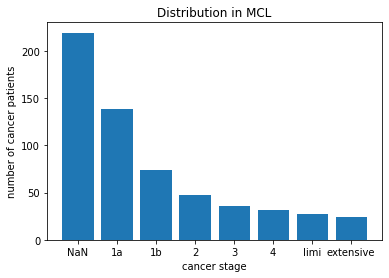

In [101]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/MetaData/self_creat/combine_meta.csv')
df = df.loc[df['gt'] == 1]
stage1a, stage1b, stage2, stage3, stage4, limi, extensive = 0, 0, 0, 0, 0, 0, 0
for i, item in df.iterrows():
    item['stage'] = str(item['stage'])
    
    if 'IV' in item['stage']:
        stage4 += 1
    elif 'III' in item['stage']:
        stage3 += 1
    elif '4' in item['stage']:
        stage4 += 1
#    if 'I' in item['stage'] and "II" not in item['stage'] and "IV" not in item['stage']:
#        stage1 += 1
    elif 'II' in item['stage'] and "III" not in item['stage']:
        stage2 += 1
    elif "3" in item['stage']:
        stage3 += 1
    elif "2" in item['stage']:
        stage2 += 1
    
    elif 'Limited' in item['stage'] or 'limited' in item['stage']:
        limi += 1
    elif 'Extensive' in item['stage'] or 'extensive' in item['stage']:
        extensive += 1
    elif '1a' in item['stage'] or 'IA' in item['stage']:
        stage1a += 1
    
    elif '1b' in item['stage'] or 'IB' in item['stage']:
        stage1b += 1
#    else:
#        print (item['mclid'])
print (stage1a, stage1b, stage2, stage3, stage4, limi, extensive)
print (stage1a + stage1b + stage2 + stage3 +  stage4 + limi + extensive)
plt.bar(['NaN', '1a', "1b", '2', '3', '4', 'limi', 'extensive'],[219, stage1a, stage1b, stage2, stage3, stage4, limi, extensive])
plt.ylabel('number of cancer patients')
plt.xlabel('cancer stage')
plt.title("Distribution in MCL")

381 49 162 147 258
997


<BarContainer object of 5 artists>

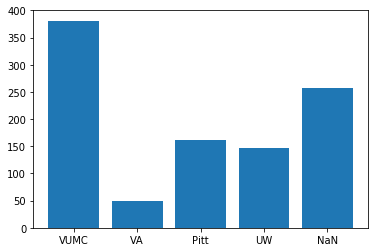

In [103]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/MetaData/self_creat/combine_meta.csv')
VUMC, VA, Pittsburgh, UW, other = 0, 0, 0, 0, 0
for i, item in df.iterrows():
    if item['inst'] != item['inst']:
        other += 1

    elif "VUMC" in item['inst'] or "Vanderbilt University" in item['inst']:
        VUMC += 1
    elif 'VA' in item['inst']:
        VA += 1
    elif "Pittsburgh" in item['inst']:
        Pittsburgh += 1
    elif "UW" in item['inst']:
        UW += 1
    else:
        other += 1
    
print (VUMC, VA, Pittsburgh, UW, other)
print (VUMC + VA + Pittsburgh + UW + other)
plt.bar(['VUMC', 'VA', 'Pitt', 'UW', 'NaN'],[VUMC, VA, Pittsburgh, UW, other])



In [72]:
df = pd.read_csv('/nfs/masi/MCL/file/clinical/LabelFile/MetaData/self_creat/combine_meta.csv')
label_list = df['label'].tolist()
label = [int('1' in i) for i in label_list]
df['gt'] = label
df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/MetaData/self_creat/combine_meta.csv', index = False)
print (sum(label))

597


In [ ]:
df = pd.read_csv()
mcl_pid = {}
for i, item in df.iterrows():
    #mclid = str(item['MCL ID']).replace(".0", '')
    mcl_pid[item['Thoracic Program Database ID (PtID)']] = item['MCL ID']


In [27]:
df = pd.read_excel('/nfs/masi/MCL/file/clinical/LabelFile/MetaData/Nodule MastersheetCurated by PPM 12-11-2018.v5.toppm.xlsx')
New_MCL_ID = []
for i, item in df.iterrows():
    imgid = str(item['Image.ID']).replace('.0', '')
    mclid = str(item['MCL.ID']).replace(".0", '')
    if len(mclid) < 6 and len(imgid) < 6:
        New_MCL_ID.append('')
    elif len(imgid) > 6:
        New_MCL_ID.append(imgid)
    else:
        New_MCL_ID.append(mclid)
df['New_MCL_ID'] = New_MCL_ID
df.to_csv('/nfs/masi/MCL/file/clinical/LabelFile/MetaData/PPM_2018.csv')

# for NLST

In [85]:
df = pd.read_csv('/nfs/masi/NLST/package-nlst-7-2018.09.24/participant.data.d100517.csv')
subj_stage = {}
for i, item in df.iterrows():
    subj_stage[item['pid']] = item['de_stag']

/home/local/VANDERBILT/gaor2/anaconda3/envs/python37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (99,248,249) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


611
53452
288 68 46 116 82 11


Text(0.5, 1.0, 'Distribution in NLST')

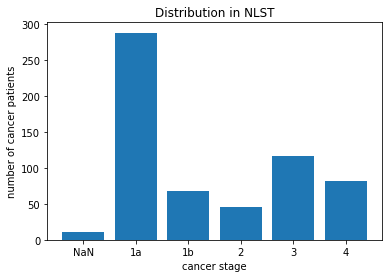

In [102]:
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/nlst/nlst_alllabel.csv')
df = df.loc[df['diag_dis'] < 1]
cancer_list = df.loc[df['gt_reg'] == 1]['subject'].tolist()
print (len(set(cancer_list)))
print (len(subj_stage.values()))
cnt = 0
stage1a, stage1b, stage2, stage3, stage4, other = 0,0,0,0,0,0
for key in subj_stage.keys():
    val = subj_stage[key]
    if key in cancer_list:
        if val == 3:
            stage1a += 1
        elif val == 4:
            stage1b += 1
        elif val == 6 or val == 7:
            stage2 += 1
        elif val == 8 or val == 9:
            stage3 += 1
        elif val == 10:
            stage4 += 1
        else:
            other += 1
        
print (stage1a, stage1b, stage2, stage3, stage4, other)
plt.bar(['NaN', '1a', "1b", '2', '3', '4'],[other, stage1a, stage1b, stage2, stage3, stage4])
plt.ylabel('number of cancer patients')
plt.xlabel('cancer stage')
plt.title("Distribution in NLST")

# Create modified diag dis for NLST

In [3]:
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/nlst/nlst_alllabel.csv')

stag_dict = {3:1.2, 4:0.9, 6:0.6, 7:0.6, 8:0.3, 9:0.3, 10:0, 'other': 1.5}


In [4]:
modif_diag = []
for i, item in df.iterrows():
    if item['de_stag'] not in stag_dict.keys():
        modif_diag.append(item['diag_dis'] + 1.5)
    else:
        modif_diag.append(item['diag_dis'] + stag_dict[item['de_stag']])

In [6]:
df['modif_diag_dis_0.3'] = modif_diag
df.to_csv('/nfs/masi/gaor2/data/Cotrain/nlst/nlst_alllabel.csv', index = False)

In [9]:
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/nlst/nlst_alllabel.csv')

sess_dedis = {}
for i, item in df.iterrows():
    sess_dedis[item['item']] = item['modif_diag_dis_0.3']
    

In [11]:
df = pd.read_csv('/nfs/masi/gaor2/data/Cotrain/nlst/nlst_pos1yr.csv')
de_stag = []
for i, item in df.iterrows():
    #print (i)
    de_stag.append(sess_dedis[item['item']])
    
df['de_stag'] = de_stag
df.to_csv('/nfs/masi/gaor2/data/Cotrain/nlst/nlst_pos1yr_stag0.3.csv', index = False)

# compute the stage and nod size




In [4]:
import pandas as pd
# df = pd.read_csv('/media/gaor2/8e7f6ccf-3585-4815-856e-80ce8754c5b5/data/NLST/package-nlst-7-2018.09.24/participant.data.d100517.csv')
# stage_size = {}
# for i, item in df.iterrows():
#     if item['de_stag'] == item['de_stag']:
#         if item['de_stag'] not in stage_size.keys():
#             stage_size[item['de_stag']] = []
#         stage_size[item['de_stag']].append(item['lesionsize'])
# print (stage_size)


    

In [7]:
import numpy as np
for i in range(3, 11):
    if i == 5: continue
    tmp_list = stage_size[i]
    tmp_list = [i for i in tmp_list if i ==i]
    print (i, np.mean(tmp_list))

3 17.209415584415584
4 36.26923076923077
6 20.166666666666668
7 43.5
8 33.943005181347154
9 41.91935483870968
10 42.36405529953917
